In [ ]:
import pandas as pd
import numpy as np
import scipy
from functools import reduce
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec


In [ ]:
dataset=pd.read_excel("/content/JKIA DATA updated.xlsx")

In [ ]:
dataset.head()

,Airline,Have you Made a transfer connection to this airport?,Destination Airport,Main reason for Trip,Section of aircraft you are travelling in,Return trips made in the past 12 months,Ground transport to/from the airport,Parking facilities,VFM of parking facilities,Availability of baggage trolleys/carts,...,Check-in 1,Check-in 2,Check-in 3,Nationality,Country of Residence,Gender,Age group,ADDITIONAL COMMENTS,Flight Type,Terminal
0,Kenya Airways,2,Seychelles,2,3,1,2,3,3,4,...,2,99,99,Spanish,Spain,2,3,NaN,1,T1A
1,Rwanda Airlines,2,Kigali,1,3,1,4,4,4,5,...,2,4,5,Rwandan,Rwanda,1,4,very intresting survey,1,T1A
2,Kenya Airways,2,John F.Kennedy,3,3,1,1,3,3,3,...,3,99,99,Ghana,United States,1,7,It need more improvment and hardwork,1,T1A
3,Kenya Airways,1,John F.Kennedy,3,3,1,4,5,99,99,...,99,99,99,Liberia,99,1,4,The management can work on the layover time,1,T1A
4,Emirates airlines,2,Dubai,2,3,1,99,3,2,4,...,99,2,99,Kenya,United Arab emirates,2,3,NaN,1,T2


In [ ]:
#checking missing values
dataset.isna().sum()

Airline                                                   0
Have you Made a transfer connection to this airport?      0
Destination Airport                                       0
Main reason for Trip                                      0
Section of aircraft you are travelling in                 0
Return trips made in the past 12 months                   0
Ground transport to/from the airport                      0
Parking facilities                                        0
VFM of parking facilities                                 0
Availability of baggage trolleys/carts                    0
Waiting time in check-in queue                            0
Efficiency of check-in staff                              0
courtesy and helpfulness of check-in staff                0
Waiting time at passport/ID inspection                    0
Courtesy/helpfulness of inspection staff                  0
Courtesy/helpfulness of security staff                    0
Thoroughness of security inspection staf

In [ ]:
dataset['EXPERIENCE'].dropna(axis=0,inplace=True)

In [ ]:
dataset['EXPERIENCE'].isna().sum()

109

In [ ]:
dataset['EXPERIENCE'].fillna(0,inplace=True)

In [ ]:
dataset['EXPERIENCE'].isna().sum()

0

In [ ]:
dataset[dataset['EXPERIENCE']=='NaN']

,Airline,Have you Made a transfer connection to this airport?,Destination Airport,Main reason for Trip,Section of aircraft you are travelling in,Return trips made in the past 12 months,Ground transport to/from the airport,Parking facilities,VFM of parking facilities,Availability of baggage trolleys/carts,...,Check-in 1,Check-in 2,Check-in 3,Nationality,Country of Residence,Gender,Age group,ADDITIONAL COMMENTS,Flight Type,Terminal


In [ ]:
dataset['ADDITIONAL COMMENTS'][dataset['ADDITIONAL COMMENTS']=='nan']

Series([], Name: ADDITIONAL COMMENTS, dtype: object)

In [ ]:
dataset['Airline '].value_counts().head()

Kenya Airways         424
Jambo Jet              54
JAMBO JET              24
Ethiopian Airlines     22
KLM                    18
Name: Airline , dtype: int64

In [ ]:
dataset['Feeling of being safe and secure'].value_counts()

5     312
4     224
3     128
2      40
99     16
1       8
Name: Feeling of being safe and secure, dtype: int64

In [ ]:
dataset['Cleanliness of airport terminal'][dataset['Cleanliness of washrooms']==99]

13     4
25     3
48     5
70     4
74     3
      ..
667    5
668    4
693    5
694    5
710    5
Name: Cleanliness of airport terminal, Length: 74, dtype: int64

In [ ]:
dataset.columns

Index(['Airline ', 'Have you Made a transfer connection to this airport?',
       'Destination Airport', 'Main reason for Trip',
       'Section of aircraft you are travelling in',
       'Return trips made in the past 12 months',
       'Ground transport to/from the airport', 'Parking facilities',
       'VFM of parking facilities', 'Availability of baggage trolleys/carts',
       'Waiting time in check-in queue', 'Efficiency of check-in staff',
       'courtesy and helpfulness of check-in staff',
       'Waiting time at passport/ID inspection',
       'Courtesy/helpfulness of inspection staff',
       'Courtesy/helpfulness of security staff',
       'Thoroughness of security inspection staff',
       'Waiting time at security inspection',
       'Feeling of being safe and secure',
       'Ease of finding your way through airport',
       'Flight information screens', 'Walking distance inside the terminal',
       'Ease of making connection',
       'Courtesy and helpfullness of airpo

In [ ]:
dataset['Courtesy and helpfullness of airport staff']

0       5
1       5
2       2
3       5
4      99
       ..
723     3
724     3
725     5
726    99
727     5
Name: Courtesy and helpfullness of airport staff, Length: 728, dtype: int64

In [ ]:
dataset['Cleanliness of airport terminal'][dataset['Cleanliness of airport terminal']]

4    2
5    3
3    5
5    3
2    3
    ..
4    2
5    3
5    3
5    3
4    2
Name: Cleanliness of airport terminal, Length: 728, dtype: int64

In [ ]:
dataset['Sentiment'].fillna(0,inplace=True)

In [ ]:
dataset['Sentiment']

0      NaN
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
723    0.0
724    0.0
725    0.0
726    0.0
727    0.0
Name: Sentiment, Length: 728, dtype: float64

In [ ]:
dataset['EXPERIENCE']

0                            Quick process
1                                 services
2                                      NaN
3      cleanliness of washroom and toilets
4                                      NaN
                      ...                 
723                  I had to throw my tea
724                                     99
725                                     99
726                      Few seats to wait
727          Check in staff/security staff
Name: EXPERIENCE, Length: 728, dtype: object

In [ ]:
dataset['ADDITIONAL COMMENTS']

0                                                    NaN
1                                 very intresting survey
2                   It need more improvment and hardwork
3            The management can work on the layover time
4                                                    NaN
                             ...                        
723    friendly people. Comfortable seating with char...
724                         Excellent keep on improving.
725    It's very good and flexible.It's even time fri...
726                                                   99
727                                                   99
Name: ADDITIONAL COMMENTS, Length: 728, dtype: object

In [ ]:
# dataset['EXPERIENCE'].fillna('No Comments',inplace=True)

In [ ]:
dataset['EXPERIENCE']=dataset['EXPERIENCE'].dropna(axis=0)

## Exploratory Data Analysis

In [ ]:
dataset['EXPERIENCE']= dataset['EXPERIENCE'].str.lower()
dataset['ADDITIONAL COMMENTS']= dataset['ADDITIONAL COMMENTS'].str.lower()

In [ ]:
dataset['EXPERIENCE'].head()

0                          quick process
1                               services
2                                    NaN
3    cleanliness of washroom and toilets
4                                    NaN
Name: EXPERIENCE, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['EXPERIENCE']=dataset['EXPERIENCE'].apply(lambda x:remove_stopwords(x))

dataset['ADDITIONAL COMMENTS']=dataset['ADDITIONAL COMMENTS'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['EXPERIENCE'].head()

0                   quick process
1                        services
2                             nan
3    cleanliness washroom toilets
4                             nan
Name: EXPERIENCE, dtype: object

In [ ]:
#removing Urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
dataset['EXPERIENCE']=dataset['EXPERIENCE'].apply(lambda text:remove_urls(text))
dataset['ADDITIONAL COMMENTS']=dataset['ADDITIONAL COMMENTS'].apply(lambda text:remove_urls(text))

In [ ]:
dataset['EXPERIENCE'].head()

0                   quick process
1                        services
2                             nan
3    cleanliness washroom toilets
4                             nan
Name: EXPERIENCE, dtype: object

In [ ]:
#removing numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

dataset['EXPERIENCE'] = dataset['EXPERIENCE'].apply(lambda a:remove_numbers(a))

dataset['ADDITIONAL COMMENTS']= dataset['ADDITIONAL COMMENTS'].apply(lambda a:remove_numbers(a) )

In [ ]:
dataset['EXPERIENCE'].head()

0                   quick process
1                        services
2                             nan
3    cleanliness washroom toilets
4                             nan
Name: EXPERIENCE, dtype: object

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

dataset['EXPERIENCE']  =dataset['EXPERIENCE'].apply(lambda text: remove_punctuation(text))
dataset['ADDITIONAL COMMENTS']  =dataset['ADDITIONAL COMMENTS'].apply(lambda text: remove_punctuation(text))


In [ ]:
dataset['EXPERIENCE'].head()

0                   quick process
1                        services
2                             nan
3    cleanliness washroom toilets
4                             nan
Name: EXPERIENCE, dtype: object

In [ ]:
from collections import Counter
cnt = Counter()
for text in dataset['EXPERIENCE'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('nan', 389),
 ('staff', 39),
 ('check', 27),
 ('waiting', 26),
 ('internet', 19),
 ('security', 17),
 ('time', 16),
 ('wifi', 15),
 ('airport', 14),
 ('flight', 14)]

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

dataset['EXPERIENCE']  = dataset['EXPERIENCE']  .apply(lambda text: remove_rarewords(text))


In [ ]:
dataset['EXPERIENCE'].head()

0                   quick process
1                        services
2                             nan
3    cleanliness washroom toilets
4                             nan
Name: EXPERIENCE, dtype: object

In [ ]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
dataset['EXPERIENCE'] = dataset['EXPERIENCE'] .apply(word_tokenize)
dataset['ADDITIONAL COMMENTS'] = dataset['ADDITIONAL COMMENTS'] .apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset['EXPERIENCE'].head()

0                    [quick, process]
1                          [services]
2                               [nan]
3    [cleanliness, washroom, toilets]
4                               [nan]
Name: EXPERIENCE, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#instantiate initializer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  # v for verb and a for noun
  lem=[lemmatizer.lemmatize(i,pos='v') for i in text]
  return lem

dataset['EXPERIENCE']=dataset['EXPERIENCE'].apply(lambda y:lemmatize_words(y))
dataset['ADDITIONAL COMMENTS']=dataset['ADDITIONAL COMMENTS'].apply(lambda y:lemmatize_words(y))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


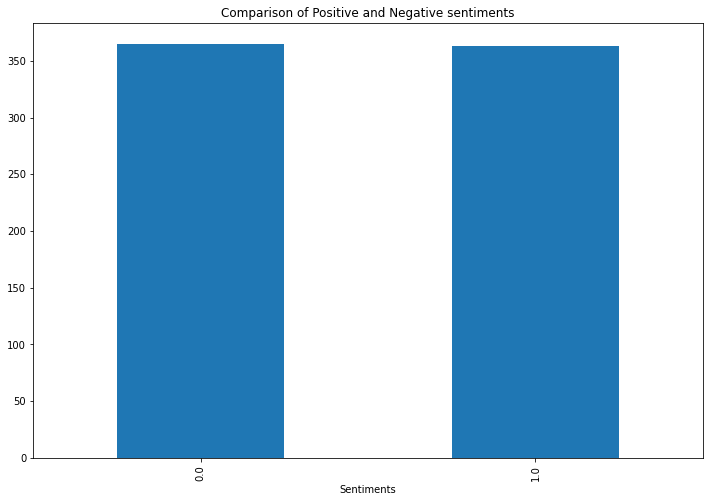

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Comparison of Positive and Negative sentiments")
plt.xlabel("Sentiments")
dataset['Sentiment'].value_counts().plot(kind='bar')


 0-Means Negative




 
 1-Means Positive


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

In [ ]:
dataset['EXPERIENCE'][dataset['EXPERIENCE']=='nan']

Series([], Name: EXPERIENCE, dtype: object)

WordCloud

In [ ]:
text = " ".join(cat.split()[0] for cat in dataset['EXPERIENCE'].astype(str))


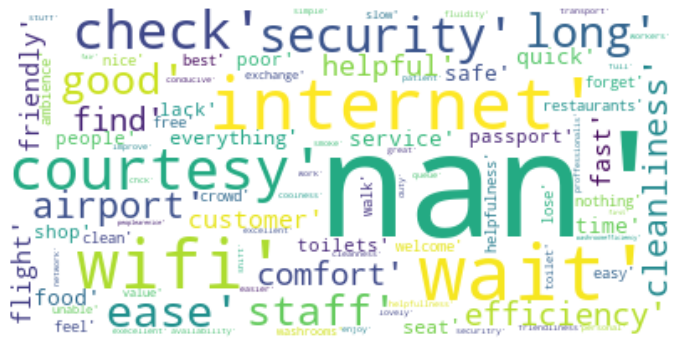

In [ ]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Additional Comments

In [ ]:
text1 = " ".join(cat.split()[0] for cat in dataset['ADDITIONAL COMMENTS'].astype(str))

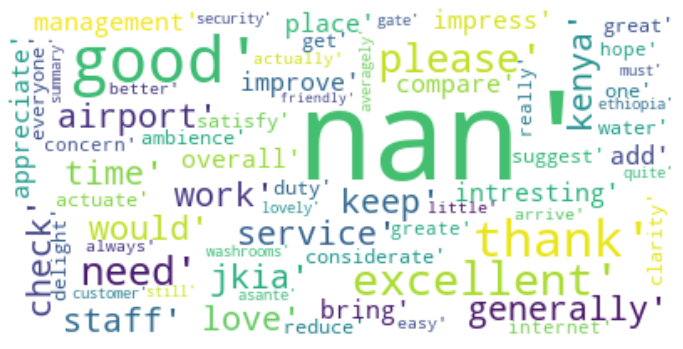

In [ ]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text1)
# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

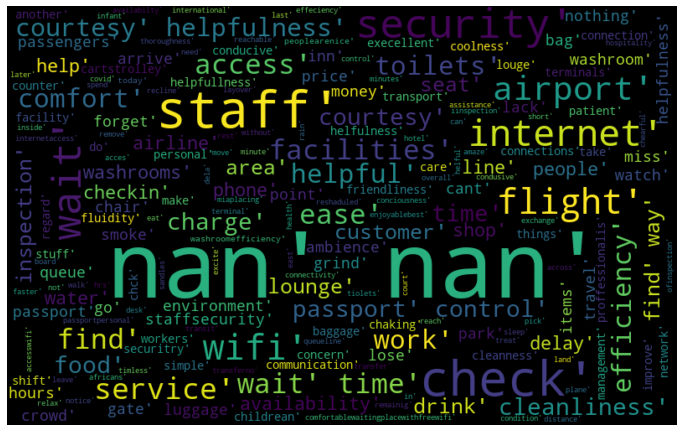

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
dataset['Sentimet'] = dataset['EXPERIENCE'].astype(str).apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Creating word Cloud for all Words in all positive tweets
positiveWords = ' '.join([text for text in dataset['EXPERIENCE'].astype(str)[dataset['Sentimet'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positiveWords)
plt.figure(figsize=(12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


#MODELLING

In [ ]:
# Split into training and testing data


x = dataset['EXPERIENCE'].astype(str)
y = dataset['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size=0.25, random_state=42)

In [ ]:
# Vectorize text comments to numbers
vec = CountVectorizer(stop_words='english',lowercase=False)
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()
print(x_train.shape,y_train.shape)

(546, 264) (546,)


In [ ]:
#Bayesian Bernoulli Model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
Ber = BernoulliNB()
Ber.fit(x_train, y_train)

BernoulliNB()

In [ ]:
#evaluating model
from sklearn import metrics
predicted = Ber.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

62.64%


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predicted)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6537


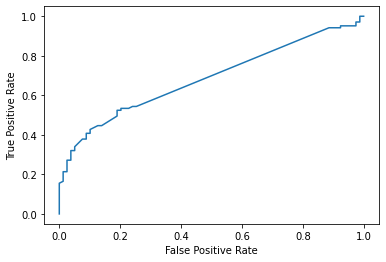

In [ ]:
#define metrics
y_pred_proba = Ber.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

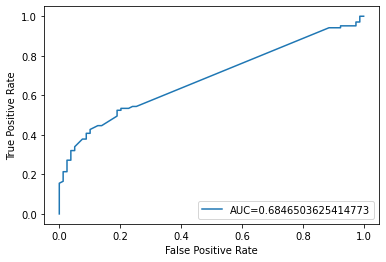

In [ ]:
#define metrics for AUC
y_pred_proba = Ber.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))

print("Classification Report")
print(classification_report(y_test, predicted))

Confusion Matrix:
[[68 11]
 [57 46]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.54      0.86      0.67        79
         1.0       0.81      0.45      0.57       103

    accuracy                           0.63       182
   macro avg       0.68      0.65      0.62       182
weighted avg       0.69      0.63      0.61       182



In [ ]:
sensitivity(conf_matrix)

NameError: ignored

In [ ]:
 recall_sensitivity = metrics.recall_score(y_test, predicted, pos_label=1)
 recall_specificity = metrics.recall_score(y_test,predicted, pos_label=0)
 recall_sensitivity, recall_specificity

(0.44660194174757284, 0.8607594936708861)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train, y_train)


LogisticRegression()

In [ ]:
#evaluating model
from sklearn import metrics
predicted = lr.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

In [ ]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

64.29%


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predicted)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6594


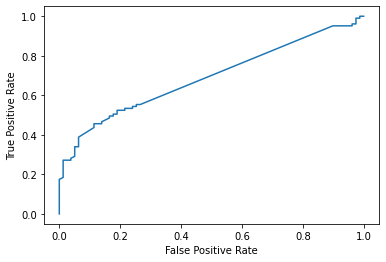

In [ ]:
#define metrics
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

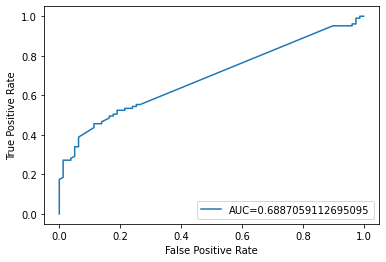

In [ ]:
#define metrics for AUC
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))

print("Classification Report")
print(classification_report(y_test, predicted))

Confusion Matrix:
[[62 17]
 [48 55]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.56      0.78      0.66        79
         1.0       0.76      0.53      0.63       103

    accuracy                           0.64       182
   macro avg       0.66      0.66      0.64       182
weighted avg       0.68      0.64      0.64       182



In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
Rand=RandomForestClassifier()
Rand.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#evaluating model
from sklearn import metrics
predicted = Rand.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

In [ ]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

60.44%


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predicted)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6416


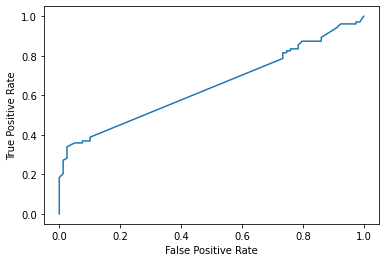

In [ ]:
#define metrics
y_pred_proba = Rand.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

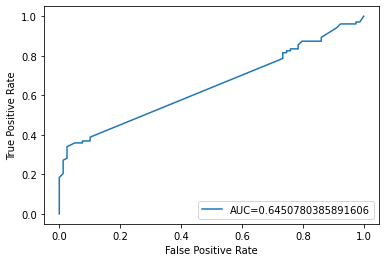

In [ ]:
#define metrics for AUC
y_pred_proba = Rand.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))

print("Classification Report")
print(classification_report(y_test, predicted))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix:


NameError: ignored

In [ ]:
#Lightgbboost classifier
import lightgbm as ltb
lg = ltb.LGBMClassifier()
lg.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
#evaluating model
from sklearn import metrics
predicted = lg.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

61.54%


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predicted)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6219


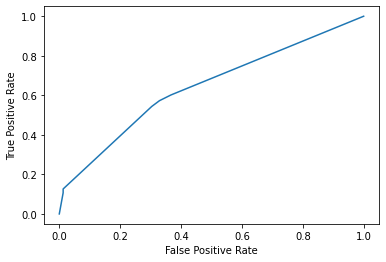

In [ ]:
#define metrics
y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

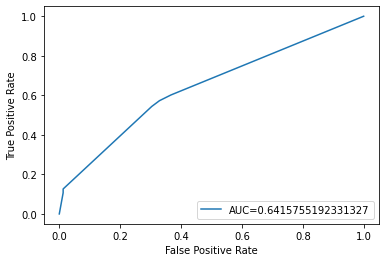

In [ ]:
#define metrics for AUC
y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))

print("Classification Report")
print(classification_report(y_test, predicted))

Confusion Matrix:
[[53 26]
 [44 59]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60        79
         1.0       0.69      0.57      0.63       103

    accuracy                           0.62       182
   macro avg       0.62      0.62      0.61       182
weighted avg       0.63      0.62      0.62       182



In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
#evaluating model
from sklearn import metrics
predicted = GB.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

62.64%


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predicted)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6419


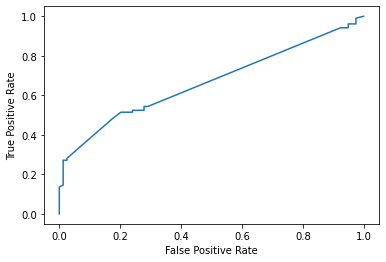

In [ ]:
#define metrics
y_pred_proba = GB.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

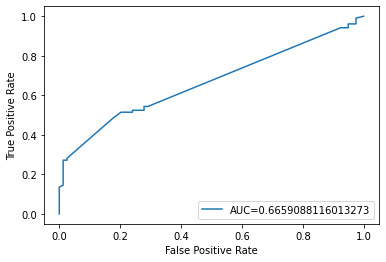

In [ ]:
#define metrics for AUC
y_pred_proba = GB.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))

print("Classification Report")
print(classification_report(y_test, predicted))

Confusion Matrix:
[[60 19]
 [49 54]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.55      0.76      0.64        79
         1.0       0.74      0.52      0.61       103

    accuracy                           0.63       182
   macro avg       0.65      0.64      0.63       182
weighted avg       0.66      0.63      0.62       182

